# **Clasificacion de imagenes Alzheimer** 🧠

In [1]:
#librería para interactuar con el sistema operativo
import os

#Librerías para el procesamiento de datos
import pandas as pd
import numpy as np

#Librerías para la visualización de datos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

#Librerías para validación del modelo y generar datos de validación
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#leer imágenes
from PIL import Image

#Librerías para el desarrollo de deep learning
import keras
from keras import layers, models
import tensorflow as tf

In [2]:
#acceder al contenido drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EXTRAER DATOS

In [3]:
#accedemos a las rutas donde se encuentran las imagenes que se van a usar
ruta_train = r'/content/drive/MyDrive/Proyectos Google Colab/Proyectos/Clasificación_Tumor_Cerebral/Brain_Tumor_MRI/Training'
ruta_test = r'/content/drive/MyDrive/Proyectos Google Colab/Proyectos/Clasificación_Tumor_Cerebral/Brain_Tumor_MRI/Testing'

In [4]:
#función para extraer los datos del path y guardarlos en un dataframe
def df_extraer(path):
    #creo las listas donde voy a guardar los datos
    X = []
    y = []


    for i in os.listdir(path): # por i en lista de carpetas del path ([MildDemented, ModerateDemented,...])
        i_path = os.path.join(path, i) # variable que guarda la union del path con el nombre de la lista(i): pathMildDemented
        file_list = os.listdir(i_path) # variable que guarda los nombres de las imagenes dentro del path i_path en una lista

        for j in file_list: # por i en la lista de imagenes
            j_path = os.path.join(i_path, j) # unir i_path con j

            X.append(j_path)
            y.append(i)

    x_series = pd.Series(X, name='x_path')
    y_series = pd.Series(y, name='y_labels')

    df = pd.concat([x_series, y_series], axis=1)

    return df

In [5]:
#extraer datos del path de entrenamieno a un dataframe
df_train = df_extraer(ruta_train)
df_train.head()

,x_path,y_labels
0,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
1,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
2,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
3,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
4,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary


In [6]:
#extraer datos del path de testeo a un dataframe
df_test = df_extraer(ruta_test)
df_test.head()

,x_path,y_labels
0,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
1,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
2,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
3,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary
4,/content/drive/MyDrive/Proyectos Google Colab/...,pituitary


## PROCESAR DATOS

### df_train

In [7]:
#tamaño del dataframe de entrenamiento
df_train.shape

(5712, 2)

In [8]:
#verificar que no haya ningun dato nullo
df_train.isna().sum()

,0
x_path,0
y_labels,0


### df_test

In [9]:
#tamaño del dataframe de testeo
df_test.shape

(1311, 2)

In [10]:
#verificar que no hayan valores nullos
df_test.isna().sum()

,0
x_path,0
y_labels,0


## EXPLORAR DATOS

### df_train

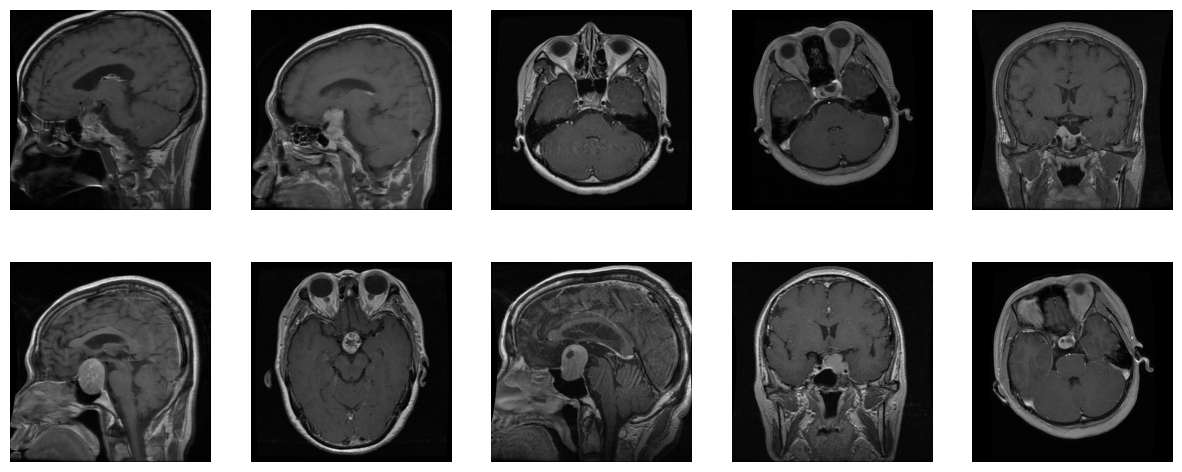

In [11]:
#ver las primeras 10 imagenes del dataframe de entrenamiento

fig = plt.figure(figsize=(15,6))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)

    #eliminamos el recuadro
    ax.axis("off")

    img = mpimg.imread(df_train['x_path'][i])

    plt.imshow(img, cmap='gray')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

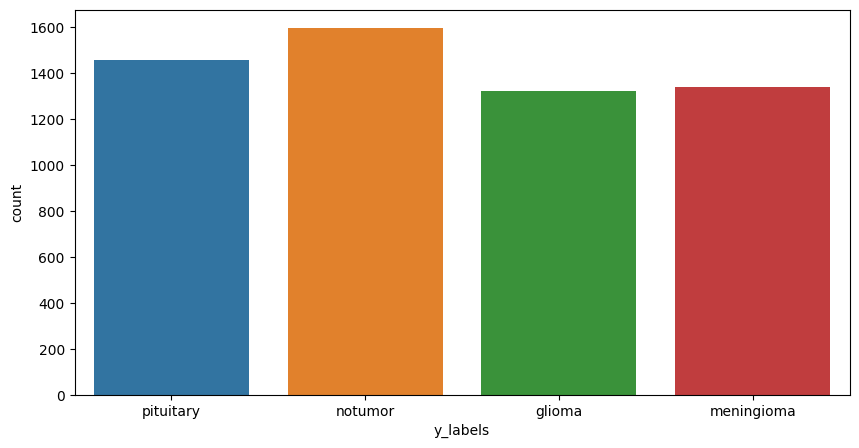

In [12]:
#ver cantidad de datos de cada clasificasión del dataframe de entrenamiento
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
sns.countplot(data= df_train, x= 'y_labels', hue='y_labels')
plt.show()

### df_test

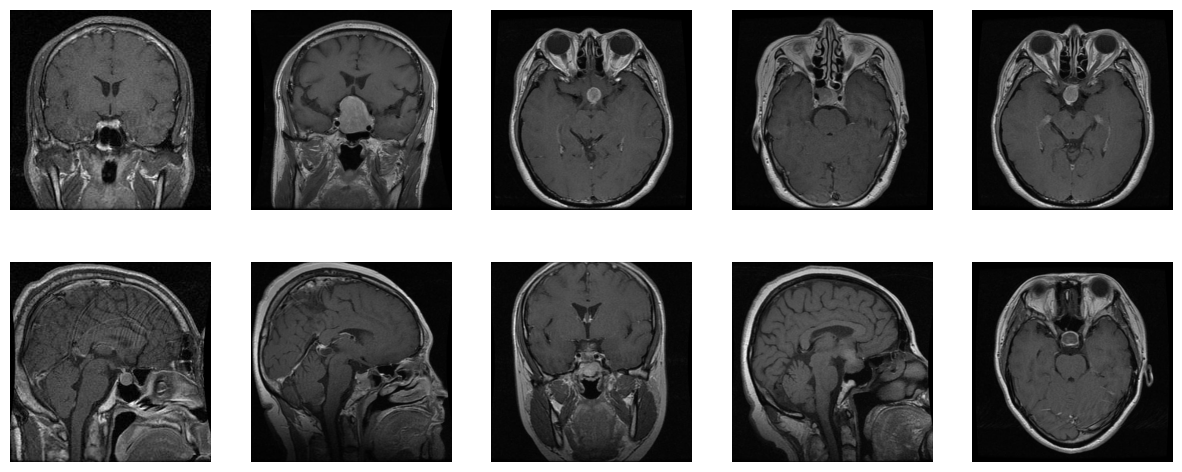

In [13]:
#ver primeras 10 imagenes del dataframe de testeo
fig = plt.figure(figsize=(15,6))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)

    #eliminamos el recuadro
    ax.axis("off")

    img = mpimg.imread(df_test['x_path'][i])

    plt.imshow(img, cmap='gray')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

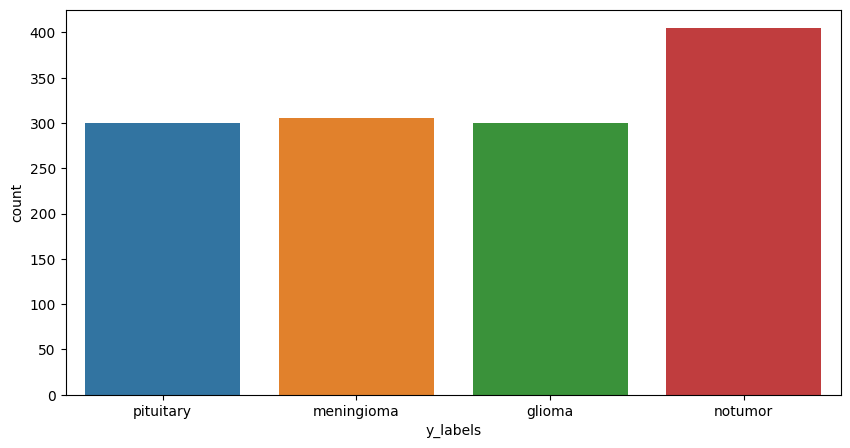

In [14]:
#visualizar la cantidad de datos para testear dependiendo de la clasificasión
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
sns.countplot(data= df_test, x= 'y_labels', hue='y_labels')
plt.show()

In [15]:
#separar el dataframe de entrenamiento en df_train y df_valid
df_test, df_valid = train_test_split(df_test, test_size=0.5,  random_state=42 , stratify=df_test['y_labels'])

In [16]:
#tamaño de cada dataframe
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(5712, 2)
(656, 2)
(655, 2)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

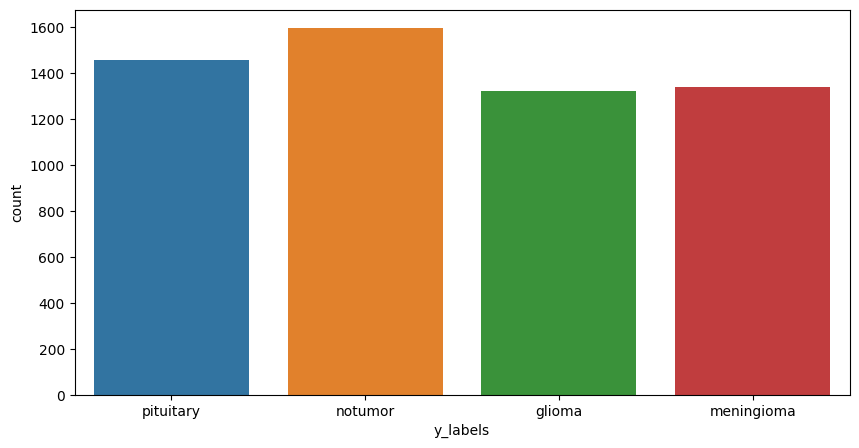

In [17]:
#visualizar la cantidad de imagenes en cada clasifición de df_train
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
sns.countplot(data= df_train, x= 'y_labels', hue='y_labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

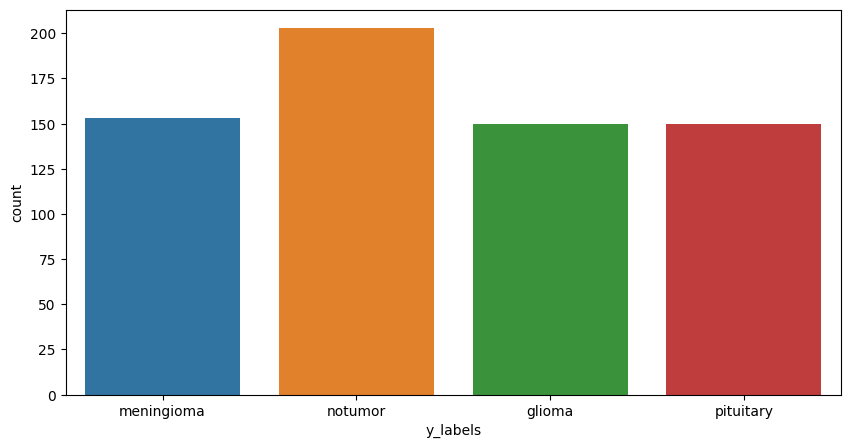

In [18]:
#visualizar la cantidad de imagenes de cada clasificación de df_valid
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
sns.countplot(data= df_valid, x= 'y_labels', hue='y_labels')
plt.show()

In [19]:
#generar las imagenes por cada dataframe y pasarselas al modelo

targ_size = (224,224) #tamaño de las imagenes
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./225) #crear el generador y normalizarlo al dividirlo por 225 (canales de color)

train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col = 'x_path',
    y_col = 'y_labels',
    target_size = targ_size,
    batch_size = 18,
    class_mode="categorical")

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col = 'x_path',
    y_col = 'y_labels',
    target_size = targ_size,
    batch_size = 18,
    class_mode = "categorical",
    shuffle = False)

validation_generator = datagen.flow_from_dataframe(
    df_valid,
    x_col = 'x_path',
    y_col = 'y_labels',
    target_size = targ_size,
    batch_size = 18,
    class_mode="categorical")

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## ENTRENAMIENTO

### Crear modelo convolucional

In [20]:
#tamaño de las imagenes
in_shape = (224, 224, 3)
in_shape

(224, 224, 3)

In [21]:
#cantidad de clases a salir
out_shape = 4
out_shape

4

In [22]:
#crear red neuronal convolucional
model = models.Sequential()

model.add(layers.Conv2D(filters=64 , kernel_size = (3,3), strides=1, padding='same', activation='relu', input_shape= in_shape))
model.add(layers.Conv2D(filters=64 , kernel_size = (3,3), strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(layers.Conv2D(filters=128 , kernel_size = (3,3), strides=1, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128 , kernel_size = (3,3), strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=256 , kernel_size = (3,3), strides=1, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=256 , kernel_size = (3,3), strides=1, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=256 , kernel_size = (3,3), strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Flatten())

model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      51,380,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,132,676 (202.69 MB)

 Trainable params: 53,132,676 (202.69 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#cantidad de pasos por epoca de entrenamiento
steps_per_epoch_train = len(train_generator)
steps_per_epoch_train

318

### Entrenar modelo

In [24]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator, verbose=1, shuffle=False)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


318/318 ━━━━━━━━━━━━━━━━━━━━ 3090s 10s/step - accuracy: 0.5205 - loss: 1.1017 - val_accuracy: 0.7439 - val_loss: 0.6008
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 69s 216ms/step - accuracy: 0.7918 - loss: 0.5186 - val_accuracy: 0.8201 - val_loss: 0.4452
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 69s 216ms/step - accuracy: 0.8657 - loss: 0.3661 - val_accuracy: 0.8552 - val_loss: 0.3493
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 82s 215ms/step - accuracy: 0.9049 - loss: 0.2571 - val_accuracy: 0.8674 - val_loss: 0.3159
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 68s 213ms/step - accuracy: 0.9301 - loss: 0.1927 - val_accuracy: 0.9024 - val_loss: 0.2904
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 70s 219ms/step - accuracy: 0.9560 - loss: 0.1218 - val_accuracy: 0.9177 - val_loss: 0.2401
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 68s 213ms/step - accuracy: 0.9690 - loss: 0.0887 - val_accuracy: 0.9253 - val_loss: 0.2227
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 69s 215ms/step - accuracy: 0.9732 - loss: 0.0793 - val

## VALIDACIÓN

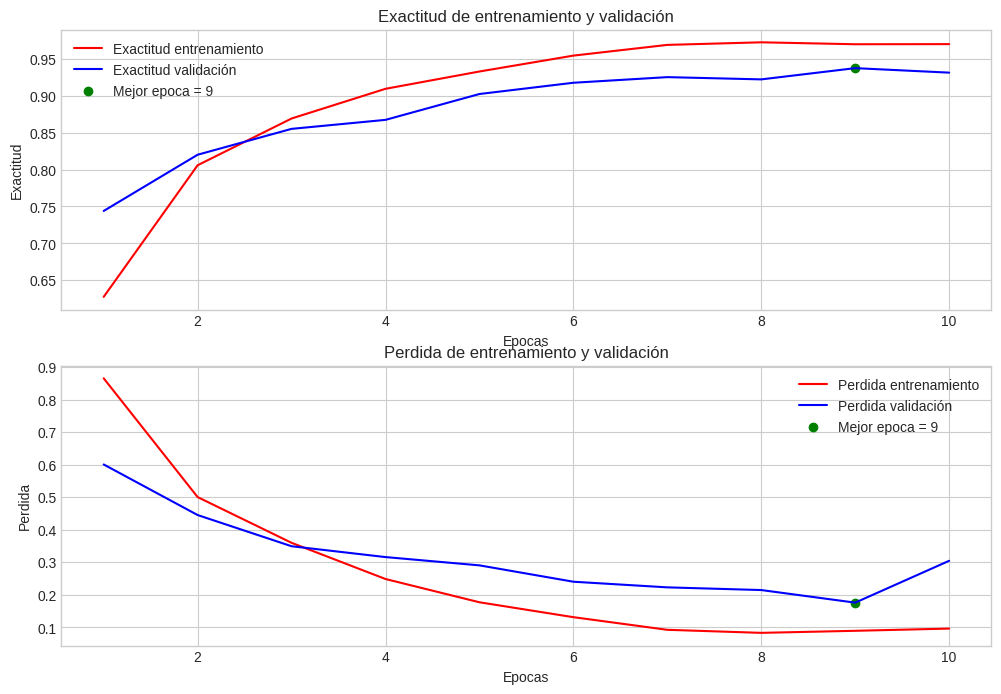

In [25]:
#visualizar la evolucion del entrenamiento

#entrenamiento
train_accu = history.history['accuracy']
train_loss = history.history['loss']

#validación
val_accu = history.history['val_accuracy']
val_loss = history.history['val_loss']

#obtener la mejor epoca del accuracy de la validación cruzada
index_val = np.argmax(val_accu)
best_val = val_accu[index_val]

#obtener la mejor epoca de loss de la validación cruzada
index_loss = np.argmin(val_loss)
best_loss = val_loss[index_loss]

#crear indice x, cantidad de epocas
epochs = [i+1 for i in range(len(train_accu))]

#leyenda para marcar las mejores epocas
best_epoch_val = f"Mejor epoca = {str(index_val+1)}"
best_epoch_loss = f"Mejor epoca = {str(index_loss+1)}"

#crear graficos de entrenamiento y perdida
fig = plt.figure(figsize=(12,8))
plt.style.use('seaborn-v0_8-whitegrid')

ax_acc = fig.add_subplot(2,1,1)
ax_acc.plot(epochs, train_accu, color = 'r', label = 'Exactitud entrenamiento')
ax_acc.plot(epochs, val_accu, color = 'b', label = 'Exactitud validación')
ax_acc.scatter(index_val+1, best_val, color = 'g', label = best_epoch_val)
plt.legend()
plt.title("Exactitud de entrenamiento y validación")
plt.xlabel('Epocas')
plt.ylabel('Exactitud')

ax_loss = fig.add_subplot(2,1,2)
ax_loss.plot(epochs, train_loss, color = 'r', label = 'Perdida entrenamiento')
ax_loss.plot(epochs, val_loss, color = 'b', label = 'Perdida validación')
ax_loss.scatter(index_loss+1, best_loss, color = 'g', label = best_epoch_loss)
plt.legend()
plt.title("Perdida de entrenamiento y validación")
plt.xlabel('Epocas')
plt.ylabel('Perdida')

plt.show()

In [26]:
# predecir los datos de testeo
y_hat_prob = model.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 241s 7s/step


In [27]:
#ejemplo de probabilidad
y_hat_prob[2]

array([3.1067605e-20, 7.5784675e-14, 1.0000000e+00, 6.6701800e-17],
      dtype=float32)

In [28]:
#quedarnos con las clases con mayor probabilidad
y_hat = np.argmax(y_hat_prob, axis=1)

In [29]:
y_hat[2]

2

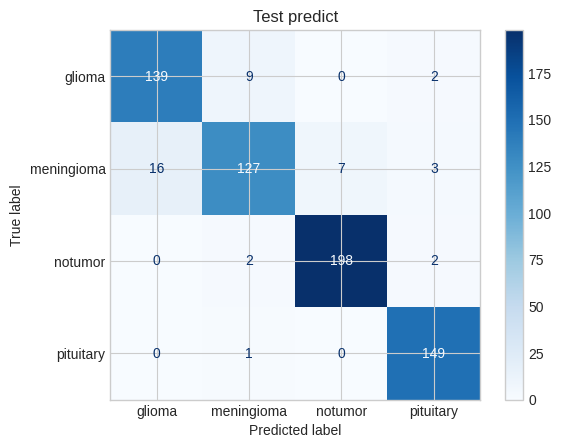

In [30]:
#MÉTRICA DE CONFUSIÓN para saber cuantas veces se equibocó el modelo con los datos de testeo

#diccionario de las clases y sus respectivos numeros
g_dict = test_generator.class_indices

#confusion matrix
cm = confusion_matrix(test_generator.classes, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=g_dict)

#color y titulo
cmd.plot(cmap=plt.cm.Blues)
plt.title("Test predict")

plt.show()

In [31]:
#lista de las clases
classes = list(g_dict.keys())

#reporte de la clasificación de los datos de testeo
print(classification_report(test_generator.classes, y_hat , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.90      0.93      0.91       150
  meningioma       0.91      0.83      0.87       153
     notumor       0.97      0.98      0.97       202
   pituitary       0.96      0.99      0.97       150

    accuracy                           0.94       655
   macro avg       0.93      0.93      0.93       655
weighted avg       0.94      0.94      0.94       655



## PROBAR MODELO

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


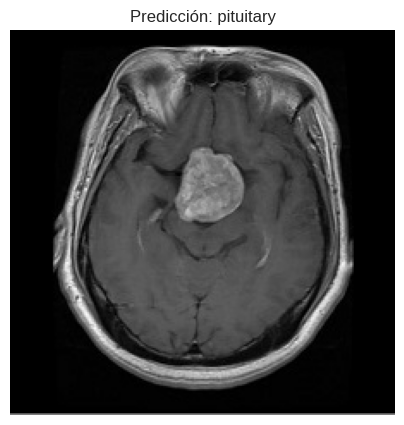

In [36]:
#Pasarle una imagen para que el modelo pueda predecir
img1 = '/content/drive/MyDrive/Proyectos Google Colab/Proyectos/Clasificación_Tumor_Cerebral/Brain_Tumor_MRI/pituitary.jpg'
image = Image.open(img1)

#se cambia el tamaño de la imagen a 224 x 224
image_res = image.resize((224,224))
#se convierte en un array
image_array = tf.keras.preprocessing.image.img_to_array(image_res)
#se normaliza
image_norm = image_array / 225.0
image_array = tf.expand_dims(image_norm, 0)

#predicción de la imagen
prediction = model.predict(image_array)
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

#mostrar imagen dada y resultado de la predicción
fig= plt.figure(figsize=(5,5))
ax= fig.add_subplot()
ax.axis("off")
img = mpimg.imread(img1)
plt.imshow(img, cmap='gray')
plt.title(f"Predicción: {class_labels[np.argmax(prediction)]}")
plt.show()